In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.optimizers import Adam,Adagrad
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# 관련 라이브러리 임포트 
import matplotlib.font_manager as fm
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.style.use('ggplot')

# 1.
```
1. trees.csv를 읽어들여서 아래에 대해
 Volume을 예측해 보세요.(텐서, 케라스, 정규화후 처리) patience 100 early stop
Girth 8.8, 10.5
Height 63, 72
```


# 텐서

In [42]:
df = pd.read_csv('../tdata/trees.csv',encoding='euc-kr')
df.head(3)
x_data = df.iloc[:,:-1].values
y_data = df.iloc[:,[-1]].values



w = tf.Variable(tf.random.uniform([2,1]))
b = tf.Variable(tf.random.uniform([1]))


scaler = MinMaxScaler()
x_norm = scaler.fit_transform(x_data)


x = tf.constant(x_norm, tf.float32)
y = tf.constant(y_data, tf.float32)



In [43]:
def compute_loss():
    hx = tf.matmul(x,w) + b 
    cost = tf.reduce_mean((hx-y)**2)
    
    return cost

In [44]:
patience = 100  
min_delta = 0.01  # (전 - 후) 값을 했을 때 이 숫자보다 작으면 조기종료 
hist_cost = [] 

pcnt = 0
optimizer = Adam(0.1)
for i in range(1000):
    optimizer.minimize(compute_loss, var_list=[w,b])  # 미분 
    c = compute_loss().numpy()
    hist_cost.append(c)

    print(i, 'cost: ',c)
    
    if i>0:
        if hist_cost[i-1] - hist_cost[i] > min_delta:
            pcnt = 0
        else:
            pcnt += 1
        if pcnt >= patience : 
            print('early stop')
            break

0 cost:  1068.1112
1 cost:  1055.7792
2 cost:  1043.5302
3 cost:  1031.3655
4 cost:  1019.2865
5 cost:  1007.2945
6 cost:  995.3907
7 cost:  983.5763
8 cost:  971.8526
9 cost:  960.2203
10 cost:  948.6807
11 cost:  937.2348
12 cost:  925.8835
13 cost:  914.6277
14 cost:  903.468
15 cost:  892.40546
16 cost:  881.4407
17 cost:  870.5743
18 cost:  859.80695
19 cost:  849.139
20 cost:  838.5711
21 cost:  828.10364
22 cost:  817.737
23 cost:  807.4713
24 cost:  797.30707
25 cost:  787.2443
26 cost:  777.2833
27 cost:  767.424
28 cost:  757.66656
29 cost:  748.011
30 cost:  738.45715
31 cost:  729.0051
32 cost:  719.6546
33 cost:  710.4055
34 cost:  701.2576
35 cost:  692.2108
36 cost:  683.2646
37 cost:  674.419
38 cost:  665.6732
39 cost:  657.0272
40 cost:  648.4805
41 cost:  640.0328
42 cost:  631.6835
43 cost:  623.43207
44 cost:  615.2782
45 cost:  607.2213
46 cost:  599.261
47 cost:  591.3964
48 cost:  583.6273
49 cost:  575.953
50 cost:  568.37286
51 cost:  560.8862
52 cost:  553.49

447 cost:  77.03579
448 cost:  76.93297
449 cost:  76.83019
450 cost:  76.72746
451 cost:  76.62478
452 cost:  76.52213
453 cost:  76.41954
454 cost:  76.31699
455 cost:  76.2145
456 cost:  76.11205
457 cost:  76.00966
458 cost:  75.9073
459 cost:  75.804985
460 cost:  75.70273
461 cost:  75.60052
462 cost:  75.498344
463 cost:  75.39625
464 cost:  75.2942
465 cost:  75.19218
466 cost:  75.090225
467 cost:  74.98831
468 cost:  74.88645
469 cost:  74.78465
470 cost:  74.68291
471 cost:  74.581215
472 cost:  74.47955
473 cost:  74.377975
474 cost:  74.276436
475 cost:  74.17496
476 cost:  74.07352
477 cost:  73.972145
478 cost:  73.87083
479 cost:  73.769554
480 cost:  73.66836
481 cost:  73.56719
482 cost:  73.4661
483 cost:  73.36506
484 cost:  73.26409
485 cost:  73.16316
486 cost:  73.0623
487 cost:  72.96149
488 cost:  72.860756
489 cost:  72.760056
490 cost:  72.65943
491 cost:  72.55886
492 cost:  72.45835
493 cost:  72.35791
494 cost:  72.25752
495 cost:  72.157196
496 cost:  72.

906 cost:  38.679794
907 cost:  38.620113
908 cost:  38.56054
909 cost:  38.501076
910 cost:  38.441692
911 cost:  38.382435
912 cost:  38.32328
913 cost:  38.26424
914 cost:  38.2053
915 cost:  38.146484
916 cost:  38.08774
917 cost:  38.029118
918 cost:  37.9706
919 cost:  37.912205
920 cost:  37.85389
921 cost:  37.795692
922 cost:  37.737617
923 cost:  37.67963
924 cost:  37.621754
925 cost:  37.56397
926 cost:  37.50631
927 cost:  37.448757
928 cost:  37.391308
929 cost:  37.333954
930 cost:  37.276695
931 cost:  37.219555
932 cost:  37.162506
933 cost:  37.10558
934 cost:  37.048756
935 cost:  36.99202
936 cost:  36.935417
937 cost:  36.878895
938 cost:  36.822495
939 cost:  36.766193
940 cost:  36.709995
941 cost:  36.6539
942 cost:  36.597923
943 cost:  36.54203
944 cost:  36.48625
945 cost:  36.430588
946 cost:  36.375008
947 cost:  36.319534
948 cost:  36.264168
949 cost:  36.208908
950 cost:  36.153744
951 cost:  36.098705
952 cost:  36.043747
953 cost:  35.9889
954 cost:  3

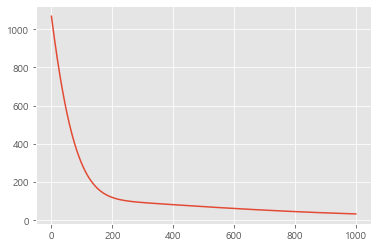

In [45]:
plt.plot(hist_cost)

In [62]:
def hxfn( xdata):
    xd = tf.constant( xdata ,tf.float32)
    hx = tf.matmul( xd, w) +b
    return hx.numpy()

In [68]:
xn = scaler.transform( [[8.8, 63], [10.5, 72]] )
xn

array([[0.04065041, 0.        ],
       [0.17886179, 0.375     ]])

In [69]:
result = hxfn(xn)
result

array([[ 8.62082 ],
       [19.682854]], dtype=float32)

# 케라스

In [29]:
df = pd.read_csv('../tdata/trees.csv',encoding='euc-kr')
df.head(3)
x_data = df.iloc[:,:-1].values
y_data = df.iloc[:,[-1]].values



w = tf.Variable(tf.random.uniform([2,1]))
b = tf.Variable(tf.random.uniform([1]))


scaler = MinMaxScaler()
x_norm = scaler.fit_transform(x_data)


x = tf.constant(x_norm, tf.float32)
y = tf.constant(y_data, tf.float32)

In [30]:
dense  = Dense(units = 1, input_dim=2)
model = Sequential([dense])
model.compile(loss = 'mse', optimizer = Adam(0.1))
earlyStop = EarlyStopping(monitor = 'loss',min_delta=0.01, patience=100)
h = model.fit(x_dataN, y ,epochs=1000, callbacks=[earlyStop])

Epoch 1/1000
1/1 [==============================] - 0s 149ms/step - loss: 1169.8542
Epoch 2/1000
1/1 [==============================] - 0s 996us/step - loss: 1156.8820
Epoch 3/1000
1/1 [==============================] - 0s 998us/step - loss: 1143.9915
Epoch 4/1000
1/1 [==============================] - 0s 996us/step - loss: 1131.1840
Epoch 5/1000
1/1 [==============================] - 0s 978us/step - loss: 1118.4608
Epoch 6/1000
1/1 [==============================] - 0s 998us/step - loss: 1105.8235
Epoch 7/1000
1/1 [==============================] - 0s 998us/step - loss: 1093.2731
Epoch 8/1000
1/1 [==============================] - 0s 2ms/step - loss: 1080.8109
Epoch 9/1000
1/1 [==============================] - 0s 995us/step - loss: 1068.4380
Epoch 10/1000
1/1 [==============================] - 0s 996us/step - loss: 1056.1558
Epoch 11/1000
1/1 [==============================] - 0s 2ms/step - loss: 1043.9653
Epoch 12/1000
1/1 [==============================] - 0s 998us/step - loss: 103

1/1 [==============================] - 0s 1ms/step - loss: 343.6533
Epoch 100/1000
1/1 [==============================] - 0s 998us/step - loss: 339.3434
Epoch 101/1000
1/1 [==============================] - 0s 1ms/step - loss: 335.0963
Epoch 102/1000
1/1 [==============================] - 0s 2ms/step - loss: 330.9114
Epoch 103/1000
1/1 [==============================] - 0s 2ms/step - loss: 326.7879
Epoch 104/1000
1/1 [==============================] - 0s 998us/step - loss: 322.7253
Epoch 105/1000
1/1 [==============================] - 0s 2ms/step - loss: 318.7227
Epoch 106/1000
1/1 [==============================] - 0s 998us/step - loss: 314.7798
Epoch 107/1000
1/1 [==============================] - 0s 998us/step - loss: 310.8957
Epoch 108/1000
1/1 [==============================] - 0s 2ms/step - loss: 307.0698
Epoch 109/1000
1/1 [==============================] - 0s 2ms/step - loss: 303.3015
Epoch 110/1000
1/1 [==============================] - 0s 2ms/step - loss: 299.5901
Epoch 111/1

1/1 [==============================] - 0s 983us/step - loss: 131.8695
Epoch 197/1000
1/1 [==============================] - 0s 997us/step - loss: 131.0761
Epoch 198/1000
1/1 [==============================] - 0s 2ms/step - loss: 130.2981
Epoch 199/1000
1/1 [==============================] - 0s 2ms/step - loss: 129.5352
Epoch 200/1000
1/1 [==============================] - 0s 2ms/step - loss: 128.7872
Epoch 201/1000
1/1 [==============================] - 0s 998us/step - loss: 128.0537
Epoch 202/1000
1/1 [==============================] - 0s 2ms/step - loss: 127.3346
Epoch 203/1000
1/1 [==============================] - 0s 997us/step - loss: 126.6294
Epoch 204/1000
1/1 [==============================] - 0s 998us/step - loss: 125.9381
Epoch 205/1000
1/1 [==============================] - 0s 3ms/step - loss: 125.2603
Epoch 206/1000
1/1 [==============================] - 0s 2ms/step - loss: 124.5956
Epoch 207/1000
1/1 [==============================] - 0s 2ms/step - loss: 123.9440
Epoch 208

1/1 [==============================] - 0s 2ms/step - loss: 96.2230
Epoch 294/1000
1/1 [==============================] - 0s 2ms/step - loss: 96.0703
Epoch 295/1000
1/1 [==============================] - 0s 997us/step - loss: 95.9191
Epoch 296/1000
1/1 [==============================] - 0s 998us/step - loss: 95.7695
Epoch 297/1000
1/1 [==============================] - 0s 2ms/step - loss: 95.6214
Epoch 298/1000
1/1 [==============================] - 0s 996us/step - loss: 95.4748
Epoch 299/1000
1/1 [==============================] - 0s 2ms/step - loss: 95.3296
Epoch 300/1000
1/1 [==============================] - 0s 2ms/step - loss: 95.1857
Epoch 301/1000
1/1 [==============================] - 0s 997us/step - loss: 95.0432
Epoch 302/1000
1/1 [==============================] - 0s 2ms/step - loss: 94.9020
Epoch 303/1000
1/1 [==============================] - 0s 2ms/step - loss: 94.7621
Epoch 304/1000
1/1 [==============================] - 0s 2ms/step - loss: 94.6234
Epoch 305/1000
1/1 [===

1/1 [==============================] - 0s 997us/step - loss: 84.8152
Epoch 392/1000
1/1 [==============================] - 0s 998us/step - loss: 84.7131
Epoch 393/1000
1/1 [==============================] - 0s 997us/step - loss: 84.6110
Epoch 394/1000
1/1 [==============================] - 0s 999us/step - loss: 84.5090
Epoch 395/1000
1/1 [==============================] - 0s 2ms/step - loss: 84.4071
Epoch 396/1000
1/1 [==============================] - 0s 2ms/step - loss: 84.3052
Epoch 397/1000
1/1 [==============================] - 0s 1000us/step - loss: 84.2034
Epoch 398/1000
1/1 [==============================] - 0s 996us/step - loss: 84.1017
Epoch 399/1000
1/1 [==============================] - 0s 2ms/step - loss: 84.0001
Epoch 400/1000
1/1 [==============================] - 0s 997us/step - loss: 83.8985
Epoch 401/1000
1/1 [==============================] - 0s 997us/step - loss: 83.7969
Epoch 402/1000
1/1 [==============================] - 0s 998us/step - loss: 83.6954
Epoch 403/10

1/1 [==============================] - 0s 2ms/step - loss: 75.0274
Epoch 490/1000
1/1 [==============================] - 0s 997us/step - loss: 74.9295
Epoch 491/1000
1/1 [==============================] - 0s 998us/step - loss: 74.8317
Epoch 492/1000
1/1 [==============================] - 0s 996us/step - loss: 74.7340
Epoch 493/1000
1/1 [==============================] - 0s 997us/step - loss: 74.6363
Epoch 494/1000
1/1 [==============================] - 0s 998us/step - loss: 74.5386
Epoch 495/1000
1/1 [==============================] - 0s 997us/step - loss: 74.4410
Epoch 496/1000
1/1 [==============================] - 0s 989us/step - loss: 74.3435
Epoch 497/1000
1/1 [==============================] - 0s 997us/step - loss: 74.2460
Epoch 498/1000
1/1 [==============================] - 0s 1ms/step - loss: 74.1485
Epoch 499/1000
1/1 [==============================] - 0s 998us/step - loss: 74.0511
Epoch 500/1000
1/1 [==============================] - 0s 998us/step - loss: 73.9537
Epoch 501/1

1/1 [==============================] - 0s 2ms/step - loss: 65.7080
Epoch 588/1000
1/1 [==============================] - 0s 2ms/step - loss: 65.6161
Epoch 589/1000
1/1 [==============================] - 0s 997us/step - loss: 65.5244
Epoch 590/1000
1/1 [==============================] - 0s 2ms/step - loss: 65.4327
Epoch 591/1000
1/1 [==============================] - 0s 2ms/step - loss: 65.3411
Epoch 592/1000
1/1 [==============================] - 0s 2ms/step - loss: 65.2496
Epoch 593/1000
1/1 [==============================] - 0s 998us/step - loss: 65.1581
Epoch 594/1000
1/1 [==============================] - 0s 2ms/step - loss: 65.0668
Epoch 595/1000
1/1 [==============================] - 0s 998us/step - loss: 64.9755
Epoch 596/1000
1/1 [==============================] - 0s 998us/step - loss: 64.8843
Epoch 597/1000
1/1 [==============================] - 0s 996us/step - loss: 64.7931
Epoch 598/1000
1/1 [==============================] - 0s 2ms/step - loss: 64.7020
Epoch 599/1000
1/1 [=

1/1 [==============================] - 0s 998us/step - loss: 57.0965
Epoch 686/1000
1/1 [==============================] - 0s 997us/step - loss: 57.0129
Epoch 687/1000
1/1 [==============================] - 0s 997us/step - loss: 56.9295
Epoch 688/1000
1/1 [==============================] - 0s 998us/step - loss: 56.8461
Epoch 689/1000
1/1 [==============================] - 0s 2ms/step - loss: 56.7628
Epoch 690/1000
1/1 [==============================] - 0s 997us/step - loss: 56.6796
Epoch 691/1000
1/1 [==============================] - 0s 998us/step - loss: 56.5966
Epoch 692/1000
1/1 [==============================] - 0s 2ms/step - loss: 56.5136
Epoch 693/1000
1/1 [==============================] - 0s 2ms/step - loss: 56.4307
Epoch 694/1000
1/1 [==============================] - 0s 2ms/step - loss: 56.3479
Epoch 695/1000
1/1 [==============================] - 0s 2ms/step - loss: 56.2652
Epoch 696/1000
1/1 [==============================] - 0s 2ms/step - loss: 56.1825
Epoch 697/1000
1/1 

1/1 [==============================] - 0s 998us/step - loss: 49.3640
Epoch 784/1000
1/1 [==============================] - 0s 2ms/step - loss: 49.2900
Epoch 785/1000
1/1 [==============================] - 0s 998us/step - loss: 49.2161
Epoch 786/1000
1/1 [==============================] - 0s 4ms/step - loss: 49.1423
Epoch 787/1000
1/1 [==============================] - 0s 2ms/step - loss: 49.0685
Epoch 788/1000
1/1 [==============================] - 0s 2ms/step - loss: 48.9949
Epoch 789/1000
1/1 [==============================] - 0s 998us/step - loss: 48.9214
Epoch 790/1000
1/1 [==============================] - 0s 2ms/step - loss: 48.8480
Epoch 791/1000
1/1 [==============================] - 0s 2ms/step - loss: 48.7746
Epoch 792/1000
1/1 [==============================] - 0s 2ms/step - loss: 48.7014
Epoch 793/1000
1/1 [==============================] - 0s 999us/step - loss: 48.6283
Epoch 794/1000
1/1 [==============================] - 0s 998us/step - loss: 48.5553
Epoch 795/1000
1/1 [=

1/1 [==============================] - 0s 2ms/step - loss: 42.5909
Epoch 882/1000
1/1 [==============================] - 0s 2ms/step - loss: 42.5268
Epoch 883/1000
1/1 [==============================] - 0s 1ms/step - loss: 42.4628
Epoch 884/1000
1/1 [==============================] - 0s 997us/step - loss: 42.3990
Epoch 885/1000
1/1 [==============================] - 0s 998us/step - loss: 42.3352
Epoch 886/1000
1/1 [==============================] - 0s 2ms/step - loss: 42.2715
Epoch 887/1000
1/1 [==============================] - 0s 997us/step - loss: 42.2079
Epoch 888/1000
1/1 [==============================] - 0s 998us/step - loss: 42.1444
Epoch 889/1000
1/1 [==============================] - 0s 2ms/step - loss: 42.0811
Epoch 890/1000
1/1 [==============================] - 0s 998us/step - loss: 42.0178
Epoch 891/1000
1/1 [==============================] - 0s 2ms/step - loss: 41.9546
Epoch 892/1000
1/1 [==============================] - 0s 2ms/step - loss: 41.8916
Epoch 893/1000
1/1 [=

1/1 [==============================] - 0s 2ms/step - loss: 36.7871
Epoch 980/1000
1/1 [==============================] - 0s 2ms/step - loss: 36.7327
Epoch 981/1000
1/1 [==============================] - 0s 998us/step - loss: 36.6785
Epoch 982/1000
1/1 [==============================] - 0s 2ms/step - loss: 36.6243
Epoch 983/1000
1/1 [==============================] - 0s 2ms/step - loss: 36.5703
Epoch 984/1000
1/1 [==============================] - 0s 998us/step - loss: 36.5163
Epoch 985/1000
1/1 [==============================] - 0s 2ms/step - loss: 36.4625
Epoch 986/1000
1/1 [==============================] - 0s 2ms/step - loss: 36.4087
Epoch 987/1000
1/1 [==============================] - 0s 2ms/step - loss: 36.3551
Epoch 988/1000
1/1 [==============================] - 0s 2ms/step - loss: 36.3015
Epoch 989/1000
1/1 [==============================] - 0s 998us/step - loss: 36.2480
Epoch 990/1000
1/1 [==============================] - 0s 999us/step - loss: 36.1947
Epoch 991/1000
1/1 [===

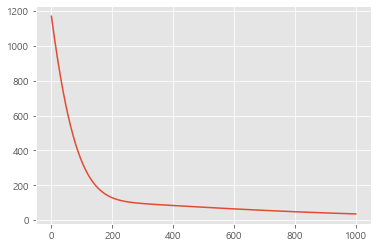

In [31]:
plt.plot(h.history['loss'])

In [32]:
xn1 = scaler.transform( np.array([8.8,63]).reshape(1,-1)  )
xn2 = scaler.transform( np.array([10.5,72]).reshape(1,-1)  )
model.predict(xn1),model.predict(xn2)

(array([[8.875221]], dtype=float32), array([[19.89665]], dtype=float32))

# 2
```
2. volume이 40 이상이면 크다
30이상이면 보통 미만이면 적음으로
아래와 같이 출력하시요
volume  정도
============
 10.3    적음
```

In [77]:
df['Volume'].max()

77.0

In [83]:
df['정도'] = pd.cut(x= df['Volume'] , bins =[0,30,40,80], labels = ['적음','보통','큼'])
df.sample(7)

,Girth,Height,Volume,정도
18,13.7,71,25.7,적음
26,17.5,82,55.7,큼
8,11.1,80,22.6,적음
24,16.3,77,42.6,큼
28,18.0,80,51.5,큼
25,17.3,81,55.4,큼
29,18.0,80,51.0,큼


In [84]:
# np.where(df['Volume']>40,'크다'

3. Height  가 가장 작은값과 큰값을
구하시요

In [87]:
df['Height'].max() ,df['Height'].min()

(87, 63)

4. girth(테두리) 가 가장큰 top5를
출력하세요  
(girth, height, volume)

In [88]:
df.nlargest(5,'Girth')

,Girth,Height,Volume,정도
30,20.6,87,77.0,큼
28,18.0,80,51.5,큼
29,18.0,80,51.0,큼
27,17.9,80,58.3,큼
26,17.5,82,55.7,큼
